In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

# European social survey

This is a biannual survey to measure the attitudes, beliefs, and behavior patterns of the various populations in Europe. Using selected questions from the 2012 and 2014 editions, address the following questions. 

## Data

In [2]:
url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv"
df = pd.read_csv(url)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


<IPython.core.display.Javascript object>

In [3]:
df.idno.nunique()

3076

<IPython.core.display.Javascript object>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Did people become less trusting from 2012 to 2014?

In [4]:
# 2 groups with 1 independent variable
trust = df[["year", "ppltrst"]]
trust.head()

# create groups for years
trust_14 = trust[trust.year == 7].ppltrst
trust_12 = trust[trust.year == 6].ppltrst

<IPython.core.display.Javascript object>

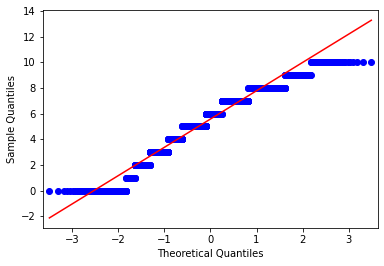

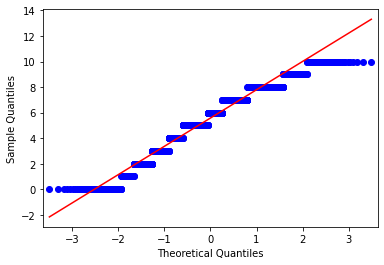

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# qqplot to se distribution normality
qqplot(trust_12, line="s")
plt.show()
qqplot(trust_14, line="s")
plt.show()

In [50]:
# sample sizes are equal sizes
print(trust_12.ppltrst.size)
print(trust_14.ppltrst.size)

4071
4076


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# test for normality of differences between samples

#  find the mean of each sample
mean_12 = trust_12.ppltrst.mean()
mean_14 = trust_14.ppltrst.mean()
print(mean_12)
print(mean_14)

5.578481945467944
5.5713935230618254


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# create a bootstrapped sample mean distribution
#  empty list to store sample means
mean_diffs = []
means_12 = []
means_14 = []
for i in range(10000):
    sample_12_mean = trust_12.sample(frac=1.0, replace=True).ppltrst.mean()
    means_12.append(sample_12_mean)
    sample_14_mean = trust_14.sample(frac=1.0, replace=True).ppltrst.mean()
    means_14.append(sample_14_mean)
    mean_diff = sample_14_mean - sample_12_mean
    mean_diffs.append(mean_diff)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

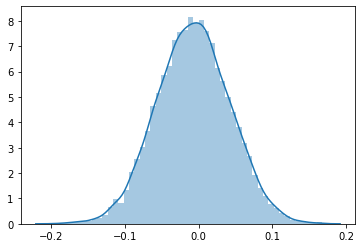

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# check the normality of the sample difference of means distribution
sns.distplot(mean_diffs)
plt.show()

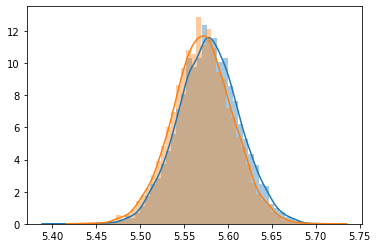

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# check distribution shape
sns.distplot(means_12)
sns.distplot(means_14)
plt.show()

In [72]:
# if the ID numbers aren't treated as unique identifiers then samples should be tested as independent
# non continuous distribution of values
t, p = stats.ttest_ind(trust_12, trust_14)
p < 0.05

# can't reject the null hypothesis that the means are the same

False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Did people become happier from 2012 to 2014?

In [5]:
# create df of just the year and happy column
h_df = df[["year", "happy"]]

<IPython.core.display.Javascript object>

In [6]:
# create groups by year
h12 = h_df[h_df.year == 6].happy
h14 = h_df[h_df.year == 7].happy

<IPython.core.display.Javascript object>

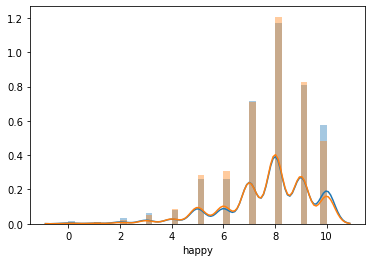

<IPython.core.display.Javascript object>

In [7]:
# sample distributions
sns.distplot(h12)
sns.distplot(h14)
plt.show()

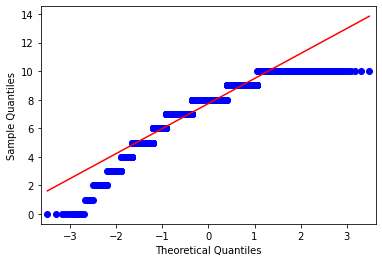

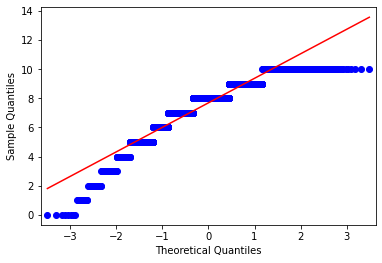

<IPython.core.display.Javascript object>

In [8]:
#  qqplot of both samples to see normality
#  not very normal distribution shapes
#  interval scale dependent variables
qqplot(h12, line="s")
plt.show()
qqplot(h14, line="s")
plt.show()

In [9]:
# mann-whitneyU test
t, p = stats.mannwhitneyu(h12, h14)

<IPython.core.display.Javascript object>

In [10]:
# able to reject the null hypothesis that people were equally happy in 2012 and 2014
p < 0.05

True

<IPython.core.display.Javascript object>

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [11]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


<IPython.core.display.Javascript object>

In [12]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

<IPython.core.display.Javascript object>

In [13]:
# create df of 2014 entries
df_14 = df[df.year == 7][["cntry", "sclmeet"]]
df_14.head()

,cntry,sclmeet
732,CH,6
733,CH,5
734,CH,7
735,CH,6
736,CH,6


<IPython.core.display.Javascript object>

In [14]:
# size of each sample by country
df_14.cntry.value_counts()

ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# create groups for individual countries
# using sweden, switzerland, norway because their sample sizes are the closest
switzerland = df_14[df_14.cntry == "CH"].sclmeet
# germany = df_14[df_14.cntry == "DE"].sclmeet
# spain = df_14[df_14.cntry == "ES"].sclmeet
norway = df_14[df_14.cntry == "NO"].sclmeet
sweden = df_14[df_14.cntry == "SE"].sclmeet

<IPython.core.display.Javascript object>

Switzerland


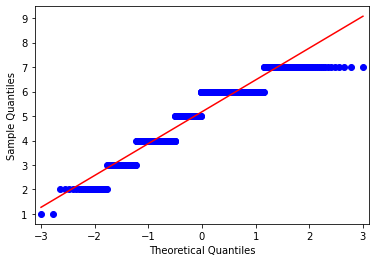

Sweden


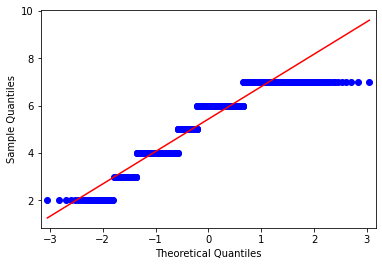

Norway


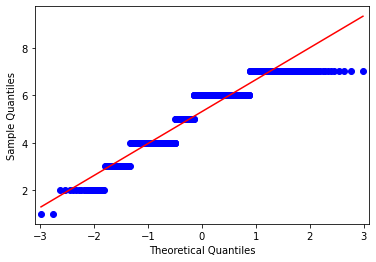

<IPython.core.display.Javascript object>

In [16]:
print("Switzerland")
qqplot(switzerland, line="s")
plt.show()
print("Sweden")
qqplot(sweden, line="s")
plt.show()
# print("Spain")
# qqplot(spain, line="s")
# plt.show()
print("Norway")
qqplot(norway, line="s")
plt.show()

# germanys distribution isn't very normal/consistent
# checked sample sizes above and only 14 records in sample

**Hard to tell the normality of the distributions because of the discreet entries for the sclmeet variable.**

In [17]:
# Jarque-Bera test for distribution normality
_, p = stats.jarque_bera(switzerland)
print("Switzerland: " + str(p))
_, p = stats.jarque_bera(sweden)
print("Sweden: " + str(p))
_, p = stats.jarque_bera(norway)
print("Norway: " + str(p))

Switzerland: 4.5285997174460135e-12
Sweden: 2.220446049250313e-16
Norway: 6.93545221253089e-12


<IPython.core.display.Javascript object>

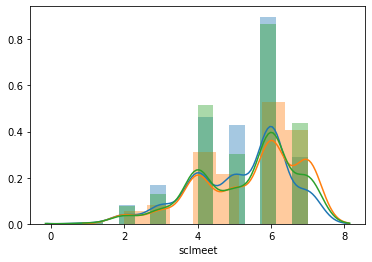

<IPython.core.display.Javascript object>

In [18]:
sns.distplot(switzerland)
sns.distplot(sweden)
sns.distplot(norway)
plt.show()

**The distributions seem to be non-normal**

In [19]:
# kruskal-wallis test for sclmeet variable
t, p = stats.kruskal(switzerland, sweden, norway)

print("Reject null hypothesis: " + str(p < 0.05))
# null rejected so all groups are not the same

Reject null hypothesis: True


<IPython.core.display.Javascript object>

In [20]:
# mann-whitneyU test for each group pair and add to
p_vals = []
t, p = stats.mannwhitneyu(switzerland, sweden)
p_vals.append(p)
t, p = stats.mannwhitneyu(switzerland, norway)
p_vals.append(p)
t, p = stats.mannwhitneyu(norway, sweden)
p_vals.append(p)
print(p_vals)

[3.274969767352643e-06, 0.011156506323492518, 0.01672227425096414]


<IPython.core.display.Javascript object>

In [21]:
# multiple tests correction
reject, p_corrected, _, bonf_alpha = multipletests(p_vals, method="bonferroni")
print("Nulls rejected: " + str(reject))
print("p_corrected: " + str(p_corrected))
print("Bonferroni alpha: " + str(bonf_alpha))

Nulls rejected: [ True  True False]
p_corrected: [9.82490930e-06 3.34695190e-02 5.01668228e-02]
Bonferroni alpha: 0.016666666666666666


<IPython.core.display.Javascript object>

**Results: People in Switzerland interacted socially significantly less on average than that of people in Sweden or Norway**

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?